
Image Filtering Application
1. Apply Median Filter
2. Apply Sobel Filter
3. Apply Gaussian Filter
4. Apply Averaging Filter
5. Exit
Enter your choice (1-5): 1
Enter kernel size for Median Filter (odd number): 5


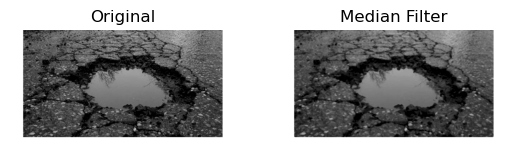


Image Filtering Application
1. Apply Median Filter
2. Apply Sobel Filter
3. Apply Gaussian Filter
4. Apply Averaging Filter
5. Exit
Enter your choice (1-5): 2


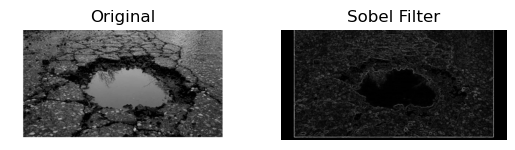


Image Filtering Application
1. Apply Median Filter
2. Apply Sobel Filter
3. Apply Gaussian Filter
4. Apply Averaging Filter
5. Exit
Enter your choice (1-5): 3
Enter kernel size for Gaussian Filter (e.g., 5 for 5x5): 5
Enter sigma value for Gaussian Filter (e.g., 0 for default): 1


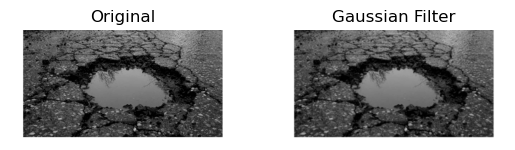


Image Filtering Application
1. Apply Median Filter
2. Apply Sobel Filter
3. Apply Gaussian Filter
4. Apply Averaging Filter
5. Exit
Enter your choice (1-5): 4
Enter kernel size for Averaging Filter (e.g., 5 for 5x5): 5


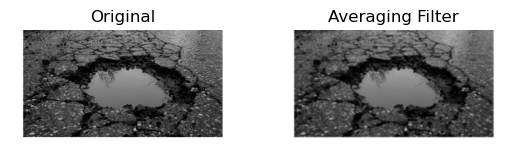


Image Filtering Application
1. Apply Median Filter
2. Apply Sobel Filter
3. Apply Gaussian Filter
4. Apply Averaging Filter
5. Exit
Enter your choice (1-5): 5
Exiting...


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

class ImageFilterApp:
    def __init__(self, image_path):

        self.image = cv2.imread('Pothole2.png', 0)
        if self.image is None:
            raise ValueError(f"Error: Could not load image from path: {image_path}")
        self.filtered_image = None

    def show_images(self, title1, image1, title2, image2):
        """Display original and filtered images side by side."""
        plt.subplot(121)
        plt.title(title1)
        plt.imshow(image1, cmap='gray')
        plt.axis('off')

        plt.subplot(122)
        plt.title(title2)
        plt.imshow(image2, cmap='gray')
        plt.axis('off')

        plt.show(block=False)
        plt.pause(3)
        plt.close()

    def apply_median_filter(self, kernel_size):
        """Apply median filter to the image."""
        self.filtered_image = cv2.medianBlur(self.image, kernel_size)
        self.show_images("Original", self.image, "Median Filter", self.filtered_image)

    def apply_sobel_filter(self):
        """Apply Sobel filter to detect edges."""
        sobelx = cv2.Sobel(self.image, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(self.image, cv2.CV_64F, 0, 1, ksize=3)
        self.filtered_image = cv2.magnitude(sobelx, sobely)
        self.show_images("Original", self.image, "Sobel Filter", self.filtered_image)

    def apply_gaussian_filter(self, kernel_size, sigma):
        """Apply Gaussian filter to the image."""
        self.filtered_image = cv2.GaussianBlur(self.image, kernel_size, sigma)
        self.show_images("Original", self.image, "Gaussian Filter", self.filtered_image)

    def apply_averaging_filter(self, kernel_size):
        """Apply averaging (mean) filter to the image."""
        self.filtered_image = cv2.blur(self.image, kernel_size)
        self.show_images("Original", self.image, "Averaging Filter", self.filtered_image)

# Menu function to allow user interaction
def menu():
    print("\nImage Filtering Application")
    print("1. Apply Median Filter")
    print("2. Apply Sobel Filter")
    print("3. Apply Gaussian Filter")
    print("4. Apply Averaging Filter")
    print("5. Exit")

if __name__ == "__main__":
    # Image path specified in the code
    image_path = "Pothole2.png"

    try:
        app = ImageFilterApp(image_path)

        while True:
            menu()
            choice = input("Enter your choice (1-5): ")

            if choice == '1':
                kernel_size = int(input("Enter kernel size for Median Filter (odd number): "))
                app.apply_median_filter(kernel_size)
            elif choice == '2':
                app.apply_sobel_filter()
            elif choice == '3':
                kernel_size = int(input("Enter kernel size for Gaussian Filter (e.g., 5 for 5x5): "))
                sigma = float(input("Enter sigma value for Gaussian Filter (e.g., 0 for default): "))
                app.apply_gaussian_filter((kernel_size, kernel_size), sigma)
            elif choice == '4':
                kernel_size = int(input("Enter kernel size for Averaging Filter (e.g., 5 for 5x5): "))
                app.apply_averaging_filter((kernel_size, kernel_size))
            elif choice == '5':
                print("Exiting...")
                break
            else:
                print("Invalid choice. Please try again.")

    except ValueError as e:
        print(e)


In [ ]:

Let's break down the code block by block and explain the underlying concepts in detail.

1. Imports and Initialization
python
Copy code
import cv2
import numpy as np
from matplotlib import pyplot as plt
Explanation of Libraries:
cv2:

Part of OpenCV, a powerful library for computer vision and image processing tasks. It provides functions for image reading, filtering, edge detection, and more.
Here, OpenCV is used for reading the image and applying various filters.
numpy (np):

A fundamental library for numerical computations in Python.
Used here implicitly as OpenCV handles images as NumPy arrays. NumPy supports array manipulation and operations which are crucial for image processing.
matplotlib.pyplot (plt):

A plotting library used here to visualize images. It provides tools to create side-by-side visualizations for comparing the original and filtered images.
2. Class Definition
python
Copy code
class ImageFilterApp:
    def __init__(self, image_path):
        self.image = cv2.imread('Pothole2.png', 0)  # Load the image in grayscale
        if self.image is None:
            raise ValueError(f"Error: Could not load image from path: {image_path}")
        self.filtered_image = None  # Placeholder for the filtered image
Explanation:
Class ImageFilterApp:

Represents the application for performing image filtering.
Classes allow encapsulating related functionality and data for reusability and clarity.
Constructor (__init__ method):

Reads the image: cv2.imread('Pothole2.png', 0) loads the image in grayscale (0 specifies grayscale mode).
Error handling: If the image is not found, a ValueError is raised.
self.filtered_image is initialized to store the filtered result for later use.
3. Method for Visualizing Images
python
Copy code
def show_images(self, title1, image1, title2, image2):
    plt.subplot(121)
    plt.title(title1)
    plt.imshow(image1, cmap='gray')
    plt.axis('off')

    plt.subplot(122)
    plt.title(title2)
    plt.imshow(image2, cmap='gray')
    plt.axis('off')

    plt.show(block=False)
    plt.pause(3)
    plt.close()
Explanation:
plt.subplot(121):

Sets up a grid for visualizing two images side-by-side. 121 specifies a 1x2 grid and selects the first subplot.
plt.imshow(image1, cmap='gray'):

Displays the first image using a grayscale colormap (cmap='gray').
plt.axis('off'):

Hides the axes for better visualization.
plt.pause(3):

Keeps the plot open for 3 seconds before closing it with plt.close().
4. Filtering Functions
(a) Median Filter
python
Copy code
def apply_median_filter(self, kernel_size):
    self.filtered_image = cv2.medianBlur(self.image, kernel_size)
    self.show_images("Original", self.image, "Median Filter", self.filtered_image)
Median Filter:
Removes noise from the image while preserving edges.
cv2.medianBlur(image, kernel_size):
Computes the median value in a square kernel of size kernel_size for each pixel.
(b) Sobel Filter
python
Copy code
def apply_sobel_filter(self):
    sobelx = cv2.Sobel(self.image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(self.image, cv2.CV_64F, 0, 1, ksize=3)
    self.filtered_image = cv2.magnitude(sobelx, sobely)
    self.show_images("Original", self.image, "Sobel Filter", self.filtered_image)
Sobel Filter:
Detects edges by calculating the gradient of intensity in the image.
cv2.Sobel:
Computes gradients in the x (1, 0) and y (0, 1) directions.
cv2.magnitude:
Combines the x and y gradients into a single edge magnitude.
(c) Gaussian Filter
python
Copy code
def apply_gaussian_filter(self, kernel_size, sigma):
    self.filtered_image = cv2.GaussianBlur(self.image, kernel_size, sigma)
    self.show_images("Original", self.image, "Gaussian Filter", self.filtered_image)
Gaussian Filter:
Smoothens the image by averaging pixel values based on a Gaussian distribution.
cv2.GaussianBlur(image, kernel_size, sigma):
kernel_size specifies the size of the Gaussian kernel (e.g., 5x5).
sigma controls the standard deviation of the Gaussian distribution.
(d) Averaging Filter
python
Copy code
def apply_averaging_filter(self, kernel_size):
    self.filtered_image = cv2.blur(self.image, kernel_size)
    self.show_images("Original", self.image, "Averaging Filter", self.filtered_image)
Averaging Filter:
Smoothens the image by computing the mean of pixel values in a kernel.
cv2.blur(image, kernel_size):
kernel_size specifies the size of the averaging kernel.
5. Menu System
python
Copy code
def menu():
    print("\nImage Filtering Application")
    print("1. Apply Median Filter")
    print("2. Apply Sobel Filter")
    print("3. Apply Gaussian Filter")
    print("4. Apply Averaging Filter")
    print("5. Exit")
Purpose:
Provides a user-friendly interface for selecting the desired filter.
Each option corresponds to a specific filter function.
6. Main Script
python
Copy code
if __name__ == "__main__":
    image_path = "Pothole2.png"

    try:
        app = ImageFilterApp(image_path)

        while True:
            menu()
            choice = input("Enter your choice (1-5): ")

            if choice == '1':
                kernel_size = int(input("Enter kernel size for Median Filter (odd number): "))
                app.apply_median_filter(kernel_size)
            elif choice == '2':
                app.apply_sobel_filter()
            elif choice == '3':
                kernel_size = int(input("Enter kernel size for Gaussian Filter (e.g., 5 for 5x5): "))
                sigma = float(input("Enter sigma value for Gaussian Filter (e.g., 0 for default): "))
                app.apply_gaussian_filter((kernel_size, kernel_size), sigma)
            elif choice == '4':
                kernel_size = int(input("Enter kernel size for Averaging Filter (e.g., 5 for 5x5): "))
                app.apply_averaging_filter((kernel_size, kernel_size))
            elif choice == '5':
                print("Exiting...")
                break
            else:
                print("Invalid choice. Please try again.")

    except ValueError as e:
        print(e)
Key Points:
User Input and Interaction:

Prompts the user to select filters and provide parameters (e.g., kernel size, sigma).
The while True loop ensures the menu keeps running until the user exits.
Error Handling:

If the image cannot be loaded, an appropriate error message is shown.
Dynamic Parameter Passing:

Users can specify kernel sizes or sigma values dynamically.
Concepts Covered:
Image Filtering:

Techniques to enhance or extract information from images.
Includes noise reduction, edge detection, and smoothing.
Edge Detection:

Sobel filters calculate gradients to detect edges, highlighting boundaries in the image.
Image Smoothing:

Filters like Gaussian and averaging reduce noise and create a smoother appearance.
User Interaction:

Menu-driven programs make code accessible to non-programmers by providing simple text-based options.
Object-Oriented Programming (OOP):

The use of a class encapsulates functionality, making the code modular and reusable.
This program combines core computer vision techniques with Python programming to provide an interactive image filtering tool.










ChatGPT 